<h1>
    <b>
        CSE-422 Project <br>
        Sales Prediction Model <br><br>
        Group 17  <br>
    </b>
</h1>
<h3>
Members:<br>
<ul>
    <li>Anindita Dash
        <ul>
            ID: 21201116
        </ul>
    </li>
    <li>Samin Sayonton Aungshuk
        <ul>
            ID: 21201721
        </ul>
    </li>
</ul>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report

In [ ]:
file_path = "/content/market_data.csv"
data = pd.read_csv(file_path)

In [ ]:
data.shape

(8523, 12)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [ ]:
print(data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


<ipython-input-15-36ad859648de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-15-36ad859648de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-15-36ad859648de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-15-36ad859648de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

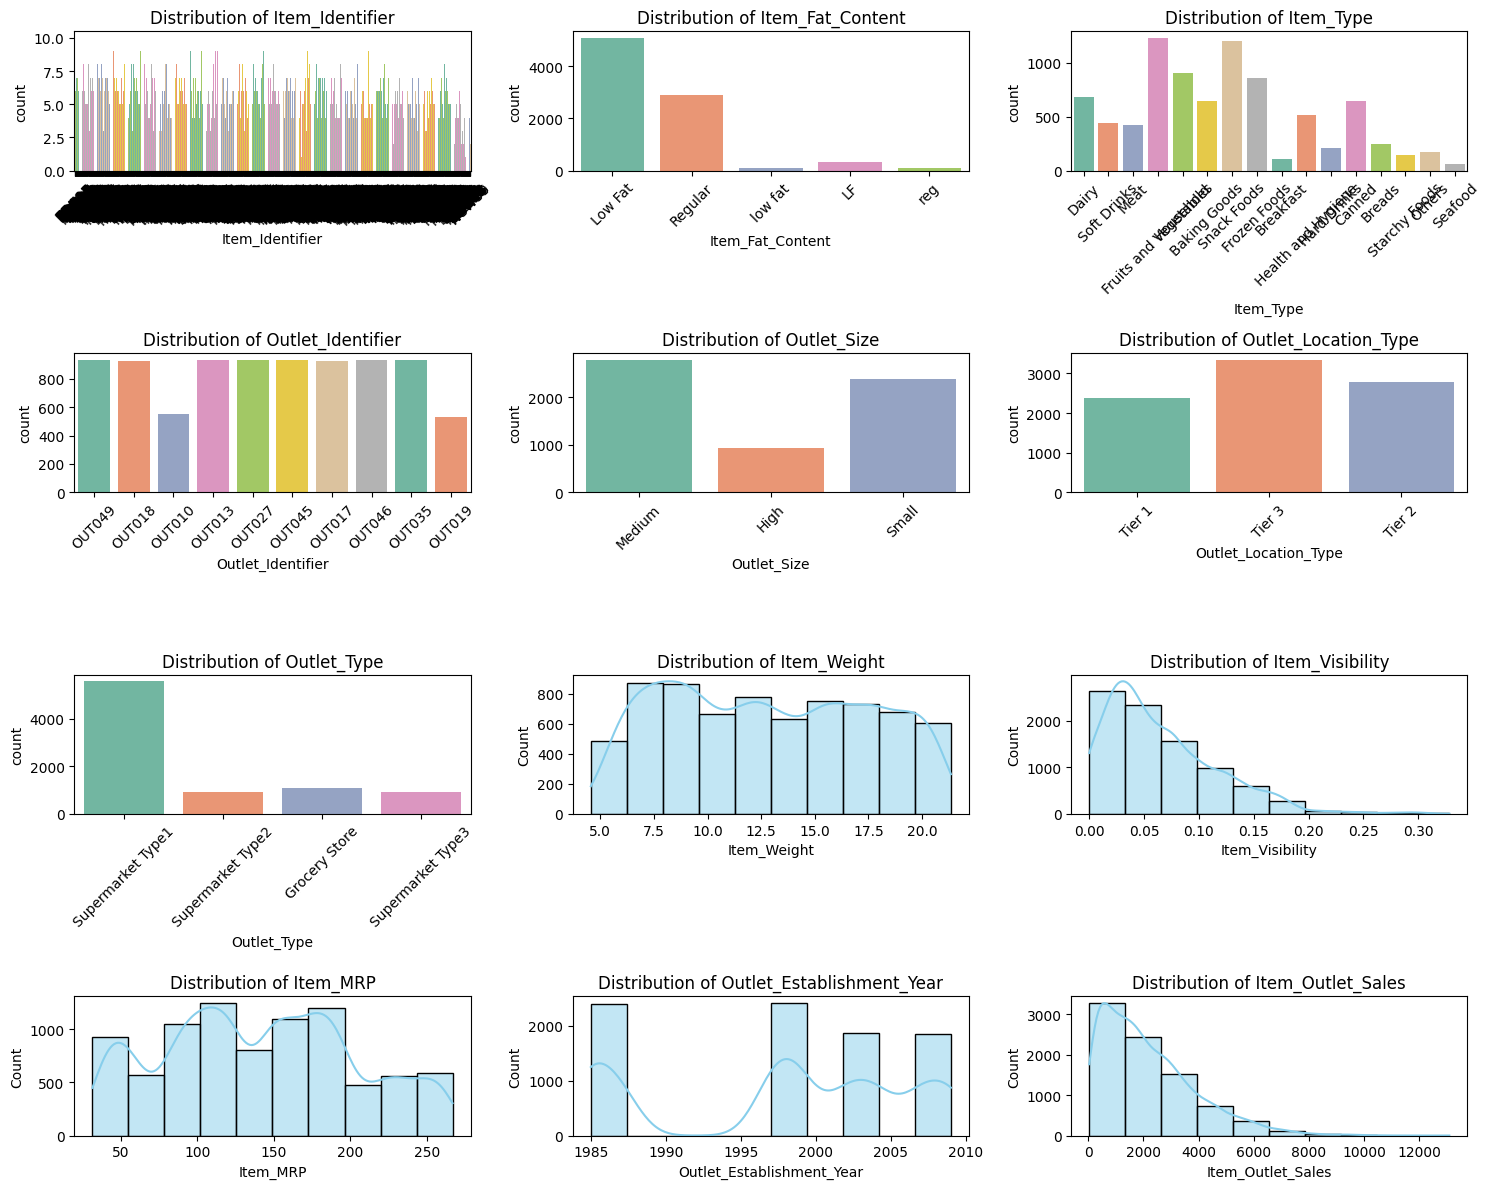

In [ ]:
plt.figure(figsize=(15, 12))

# Get the categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed
num_categorical = len(categorical_columns)
num_numerical = len(numerical_columns)

# Create a dynamic grid layout based on the number of features
total_plots = num_categorical + num_numerical
num_rows = (total_plots // 3) + (1 if total_plots % 3 != 0 else 0)  # Calculate number of rows

# 1. Plot distribution for each categorical feature
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Dynamic grid layout
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# 2. Plot distribution for each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i + num_categorical)  # Start after categorical plots
    sns.histplot(data[col], kde=True, color='skyblue', bins=10)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


<Axes: >

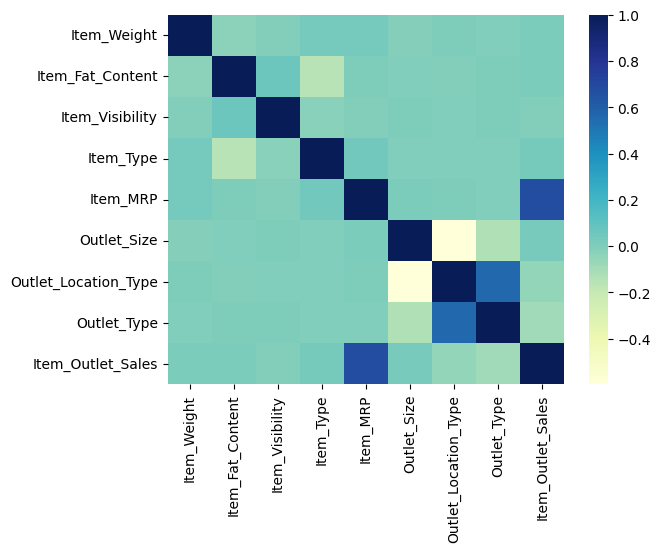

In [ ]:
  df = pd.DataFrame(data)
  correlation = df.corr()
  sns.heatmap(correlation, cmap = 'YlGnBu')
# correlation = data.corr()  # Calculate correlation directly on 'data'
# plt.figure(figsize=(12, 10))  # Adjust figure size as needed
# sns.heatmap(correlation, cmap='YlGnBu', annot=True)  # Add annotations for clarity
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# print(data['Item_Identifier'].value_counts())
# print(data['Item_Weight'].value_counts())
# print(data['Item_Type'].value_counts())
# print(data['Item_MRP'].value_counts())
# print(data['Outlet_Identifier'].value_counts())
# print(data['Outlet_Identifier'].value_counts())
# print(data['Outlet_Establishment_Year'].value_counts())
# print(data['Outlet_Size'].value_counts())
# print(data['Outlet_Location_Type'].value_counts())
# print(data['Outlet_Type'].value_counts())
# print(data['Item_Outlet_Sales'].value_counts())

In [ ]:
# List of Item_Weight values to drop
weights_to_drop = [7.685, 9.420, 6.520, 5.400]

# Drop rows where Item_Weight is in the list
data = data[~data['Item_Weight'].isin(weights_to_drop)]

data.dropna(subset=['Item_Weight'], inplace=True)
data.dropna(subset=['Outlet_Size'], inplace=True)

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
data = data.drop(columns=['Item_Identifier'])
data = data.drop(columns=['Outlet_Establishment_Year'])
data = data.drop(columns=['Outlet_Identifier'])

In [ ]:
data.nunique()

,0
Item_Weight,407
Item_Fat_Content,5
Item_Visibility,4278
Item_Type,16
Item_MRP,3805
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,2
Item_Outlet_Sales,2448


In [ ]:
print(data['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    2772
Regular    1575
LF          177
reg          71
low fat      53
Name: count, dtype: int64


In [ ]:
data.loc[data["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = "Low Fat"
data.loc[data["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = "Low Fat"
data.loc[data["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = "Regular"

In [ ]:
print(data['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    3002
Regular    1646
Name: count, dtype: int64


In [ ]:
data.nunique()
data.shape

(4648, 9)

In [ ]:
le = LabelEncoder()
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])
# data = pd.get_dummies(data, columns=['Item_Type'])
# data = pd.get_dummies(data, columns=['Outlet_Location_Type'])
# data = pd.get_dummies(data, columns=['Outlet_Type'])

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1,0,0,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2,1,443.4228
2,17.500,0,0.016760,10,141.6180,1,0,0,2097.2700
4,8.930,0,0.000000,9,53.8614,0,2,0,994.7052
5,10.395,1,0.000000,0,51.4008,1,2,1,556.6088


In [ ]:
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:

X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']
#model_pipeline.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (3253, 8)
Testing Features Shape: (1395, 8)
Training Target Shape: (3253,)
Testing Target Shape: (1395,)


In [ ]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
dt_model.score(X_test, y_test)

Mean Squared Error: 2410438.9496823223
R^2 Score: -0.0570570310092986


-0.0570570310092986

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True, fontsize=10)
plt.show()

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
lr_model.score(X_test, y_test)

Linear Regression Model Performance:
Mean Squared Error (MSE): 1234881.11
R-squared (R2 Score): 0.46


0.4584638774948826

In [ ]:
# Initialize the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50),
                         activation='relu',
                         solver='adam',
                         max_iter=500,
                         random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp_model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MLP Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
mlp_model.score(X_test, y_test)

MLP Regressor Performance:
Mean Squared Error (MSE): 1235620.15
R-squared (R2 Score): 0.46


0.45813978632203844

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)
#print(y_pred)
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
rf_model.score(X_test, y_test)

Random Forest Regressor Performance:
Mean Squared Error (MSE): 1369336.57
R-squared (R2 Score): 0.40


0.39950072097418776

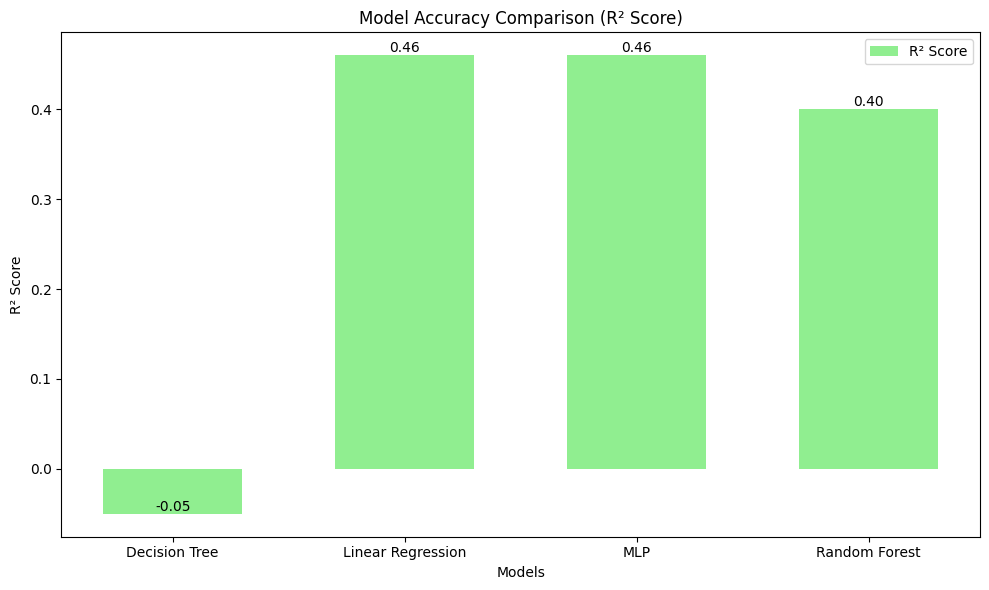

In [ ]:
models = ['Decision Tree', 'Linear Regression', 'MLP', 'Random Forest']
r2 = [-0.05, 0.46, 0.46, 0.40]
# Bar chart configuration
x = np.arange(len(models))  # Positions for each bar
width = 0.6  # Width of the bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot R² scores (accuracy for regression models)
bars = ax.bar(x, r2, width, color='lightgreen', label='R² Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Model Accuracy Comparison (R² Score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add data labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)  # Add data labels on bars

add_labels(bars)


plt.tight_layout() # Show plot
plt.show()

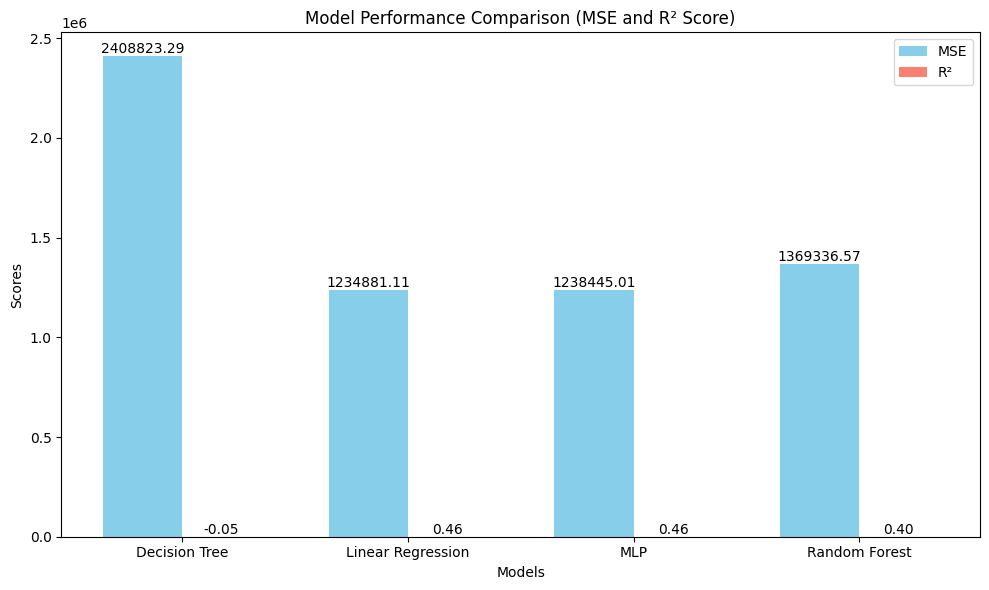

In [ ]:
# Example data: Model performance metrics
models = ['Decision Tree', 'Linear Regression', 'MLP', 'Random Forest']
mse = [2408823.29, 1234881.11, 1238445.01, 1369336.57]  # Example MSE values
r2 = [-0.05, 0.46, 0.46, 0.40]  # Example R² values

# Bar chart configuration
x = np.arange(len(models))  # Positions for each bar group
width = 0.35  # Width of the bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot MSE and R² Score
bars1 = ax.bar(x - width/2, mse, width, label='MSE', color='skyblue')
bars2 = ax.bar(x + width/2, r2, width, label='R²', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison (MSE and R² Score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add data labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'rf_model' is your trained Random Forest Regressor
# and 'numeric_columns' are the columns you scaled

def predict_sales(input_data):
    """Predicts sales for given input data."""

    # Convert input_data to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)  # Assuming X is your features DataFrame

    # Scale numeric columns
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])

    # Predict using the Random Forest model
    predicted_sales = rf_model.predict(input_df)

    return predicted_sales[0]  # Return the single predicted value

# Get input values from the user
input_data = {}
for column in X.columns:
  input_data[column] = float(input("Enter value for " + column + ": "))

# Predict and display the result
predicted_sales = predict_sales(input_data)
print("Predicted Item_Outlet_Sales:", predicted_sales)

Enter value for Item_Weight: 9.25
Enter value for Item_Fat_Content: 1
Enter value for Item_Visibility: 0.07
Enter value for Item_Type: 4
Enter value for Item_MRP: 59.8
Enter value for Outlet_Size: 0
Enter value for Outlet_Location_Type: 1
Enter value for Outlet_Type: 2
Predicted Item_Outlet_Sales: 1104.9749959999995
